In [ ]:
#author of model and analysis: Alejo Alegre Bustos

#source of data df_combinado = pd.merge(dd, dw, on='Athlete ID', how='inner')

# 📅 Dataset Semanal
# 🏃‍♂️ Carga de entrenamiento
# nr. sessions: número de sesiones de entrenamiento en la semana.

# nr. rest days: número de días sin entrenamiento.

# total kms: kilómetros totales recorridos en la semana.

# max km one day: distancia máxima recorrida en un solo día.

# total km Z3-Z4-Z5-T1-T2: suma de kilómetros en zonas de intensidad media-alta a máxima.

# nr. tough sessions (effort in Z5, T1 or T2): número de sesiones muy exigentes.

# nr. days with interval session: cuántos días se hicieron entrenamientos con intervalos.

# total km Z3-4: kilómetros en zonas 3 y 4 (media-alta intensidad).

# max km Z3-4 one day: máximo de km en Z3-4 en un solo día.

# total km Z5-T1-T2: kilómetros en zonas de alta intensidad (Z5, T1, T2).

# max km Z5-T1-T2 one day: máximo en esas zonas en un solo día.

# total hours alternative training: horas de entrenamiento alternativo (no carrera).

# nr. strength trainings: cantidad de sesiones de fuerza.

# 📈 Esfuerzo y recuperación
# avg exertion, min exertion, max exertion: esfuerzo percibido promedio, mínimo y máximo.

# avg training success, min training success, max training success: percepción del éxito del entrenamiento.

# avg recovery, min recovery, max recovery: percepción de recuperación tras las sesiones.

# 📌 Otras
# Athlete ID: identificador del atleta.

# injury: si hubo lesión esa semana.

# rel total kms week 0_1, 0_2, 1_2: cambio relativo de kms entre semanas.

# Date: fecha de la semana (inicio o fin).


In [ ]:
# 📆 Dataset Diario
# 🏃‍♂️ Carga de entrenamiento
# nr. sessions: número de sesiones realizadas ese día.

# total km: distancia total recorrida.

# km Z3-4: km en zona 3 o 4.

# km Z5-T1-T2: km en zonas de alta intensidad.

# km sprinting: distancia a velocidad máxima.

# strength training: si se hizo entrenamiento de fuerza (valor binario o tiempo).

# hours alternative: duración del entrenamiento alternativo ese día.

# 📈 Esfuerzo y recuperación
# perceived exertion: esfuerzo percibido por el atleta.

# perceived trainingSuccess: cuán exitoso sintió que fue el entrenamiento.

# perceived recovery: cuán recuperado se sintió después.

# 📌 Otras
# Athlete ID: identificador del atleta.

# injury: si hubo lesión ese día.

# Date: fecha del entrenamiento.

In [ ]:
!pip install scikit-learn==1.5.2
!pip install plotnine
!pip install folium branca ipywidgets
!pip install PyExecJS



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14576 sha256=07d30650a5c29c7d64099882ac11125c1251dc8809b4788790c5444c3aa3b0ab
  Stored in directory: /root/.cache/pip/wheels/0e/29/b2/02d071c92586aa5dbfd67cda8aea1a680900a530217d5ecf6c
Successfully built PyExecJS


In [ ]:


import pandas as pd
import plotnine
import matplotlib.pyplot as plt


dd = pd.read_csv('/content/day_series_data.csv')
dw = pd.read_csv('/content/wekk_series_data.csv')
dd


,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.00,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2143
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2286
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.00,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2483
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.00,0.87,0.86,0.20,...,0.0,0.0,0.0,0.0,0.79,0.80,0.11,71,1,2647


In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

In [ ]:
dw

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.00,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.00,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42793,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.20,0.12,0.26,71,1,2.479167,1.101852,0.444444,2143
42794,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.12,0.12,0.12,71,1,1.054545,1.288889,1.222222,2286
42795,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.32,0.17,0.62,71,1,0.750980,0.743689,0.990291,2483
42796,5.0,2.0,67.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.91,0.28,0.22,0.41,71,1,2.005988,1.238447,0.617375,2647


In [ ]:
df_combinado = pd.merge(dd, dw, on='Athlete ID', how='inner')
df_combinado

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
housing['year']=(housing['date'].apply(lambda x:x[0:4])).astype(int)
housing['month']=(housing['date'].apply(lambda x:x[4:6])).astype(int)
housing['day']=(housing['date'].apply(lambda x:x[6:8])).astype(int)
housing = housing.drop(columns=['date'])
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   bedrooms       20000 non-null  int64  
 2   bathrooms      20000 non-null  float64
 3   sqft_living    20000 non-null  int64  
 4   sqft_lot       20000 non-null  int64  
 5   floors         20000 non-null  float64
 6   waterfront     20000 non-null  int64  
 7   view           20000 non-null  int64  
 8   condition      20000 non-null  int64  
 9   grade          20000 non-null  int64  
 10  sqft_above     20000 non-null  int64  
 11  sqft_basement  20000 non-null  int64  
 12  yr_built       20000 non-null  int64  
 13  yr_renovated   20000 non-null  int64  
 14  zipcode        20000 non-null  int64  
 15  lat            20000 non-null  float64
 16  long           20000 non-null  float64
 17  sqft_living15  20000 non-null  int64  
 18  sqft_l

['view', 'waterfront', 'bathrooms', 'price', 'sqft_lot', 'yr_built', 'sqft_living', 'sqft_lot15', 'zipcode', 'sqft_above', 'grade', 'long', 'bedrooms', 'lat', 'sqft_basement', 'floors', 'sqft_living15']


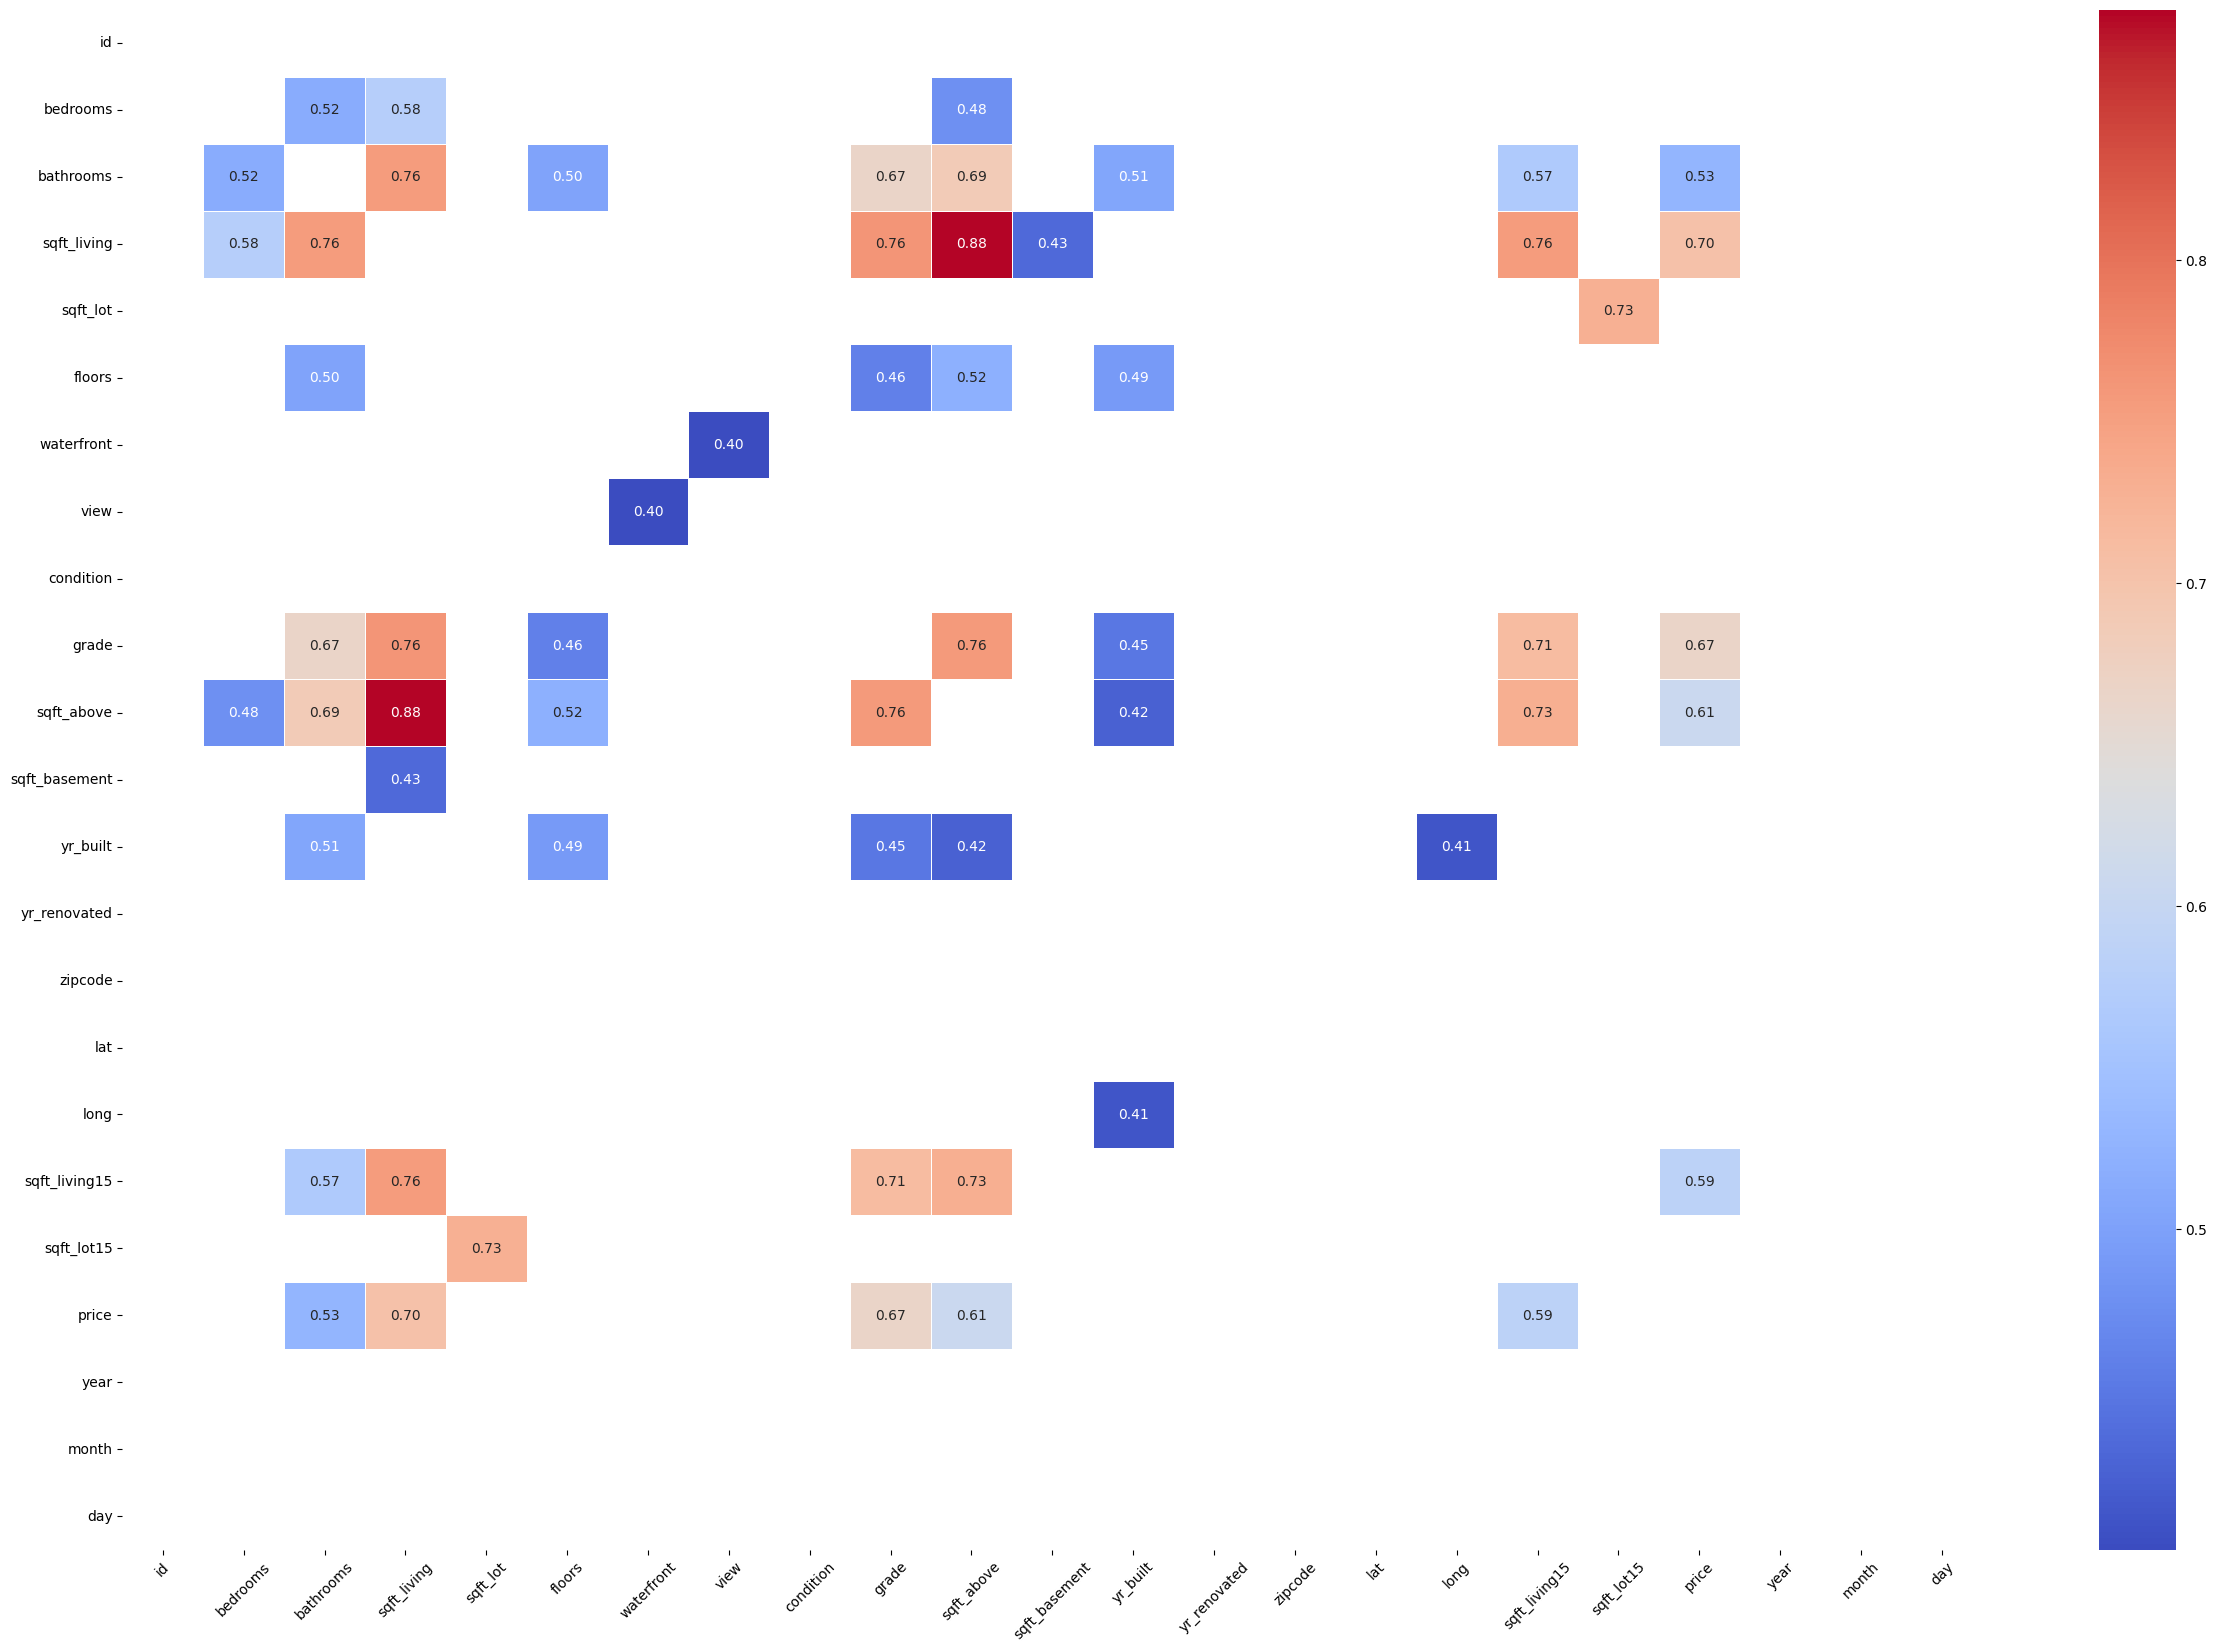

In [ ]:
corrdf = housing.corr()


filtered_corr = corrdf.where((corrdf >= 0.25) & (corrdf != 1.0))
correlated_columns = set()


for column in filtered_corr.columns:
    correlated_columns.update(filtered_corr[column].dropna().index)

#list set
correlated_columns = list(correlated_columns)

print(correlated_columns)
filtered_corrdf = corrdf[(corrdf >= 0.4) & (corrdf != 1.0)]
plt.figure(figsize=(30, 20))
sns.heatmap(filtered_corrdf, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

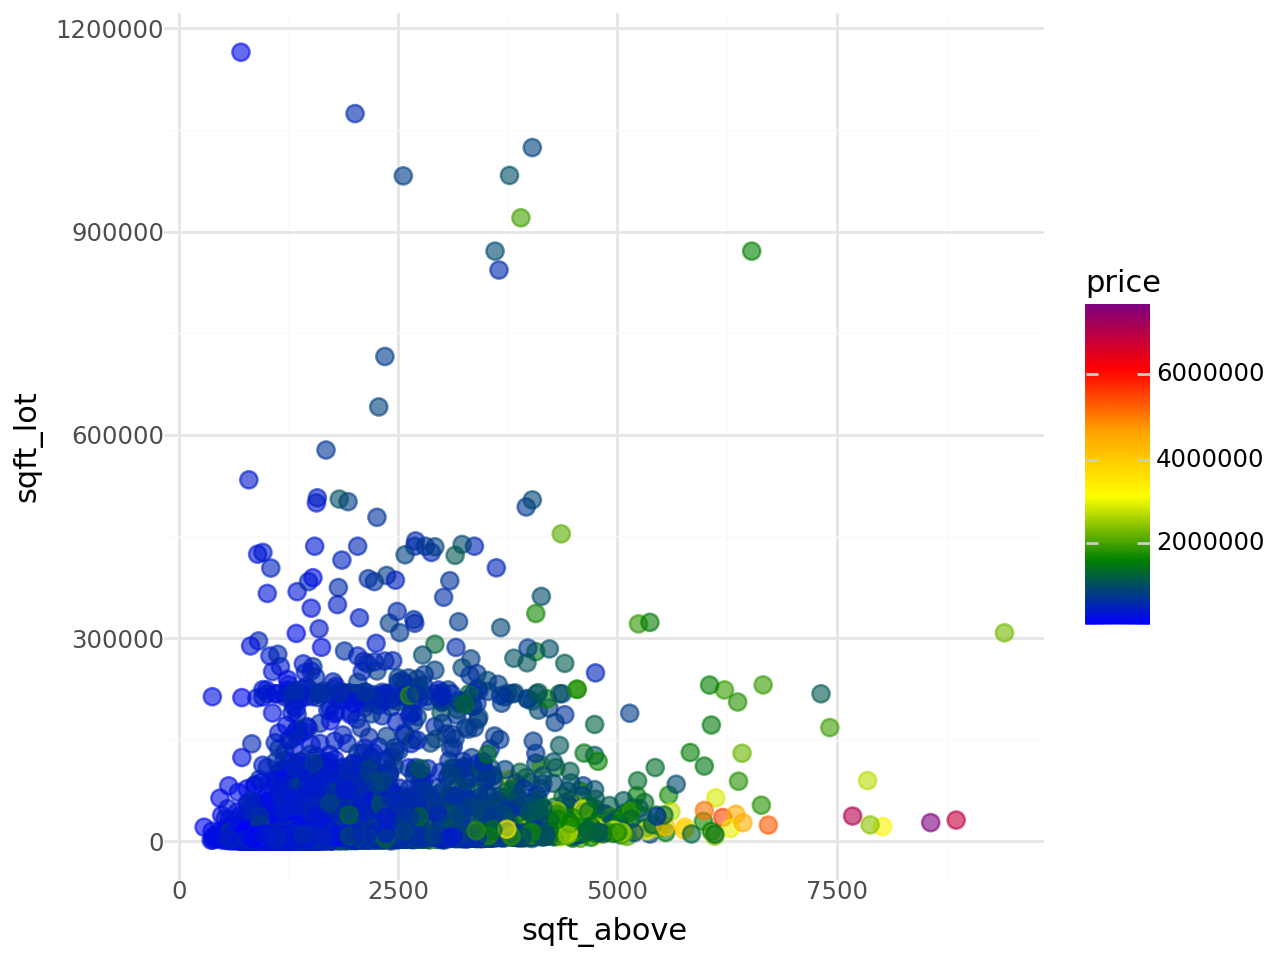

In [ ]:
#relationship btw sqft-lot and sqft-above showing price

from plotnine import ggplot, aes, geom_point, facet_wrap, scale_color_gradientn, theme_minimal

(ggplot(data=housing, mapping=aes(x='sqft_above', y='sqft_lot', color='price')) + \
    geom_point(size=3, alpha=0.6) +
    scale_color_gradientn(colors=["blue","green","yellow" ,"orange", "red","purple"]) + \
    theme_minimal())


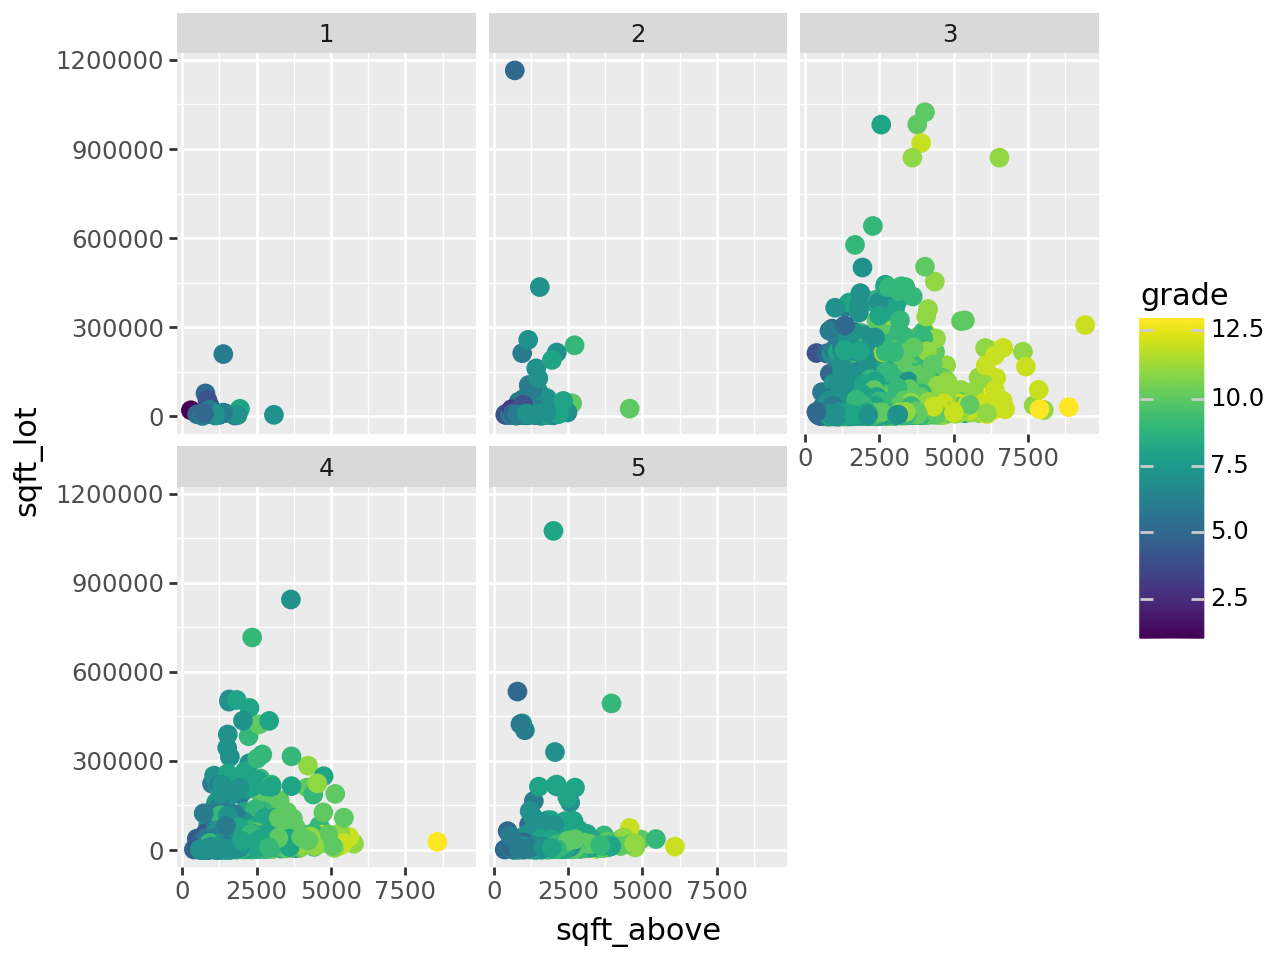

In [ ]:
(ggplot(data=housing, mapping=aes(x='sqft_above', y='sqft_lot',color='grade')) +
    geom_point(size=3) +
    facet_wrap(facets='condition'))

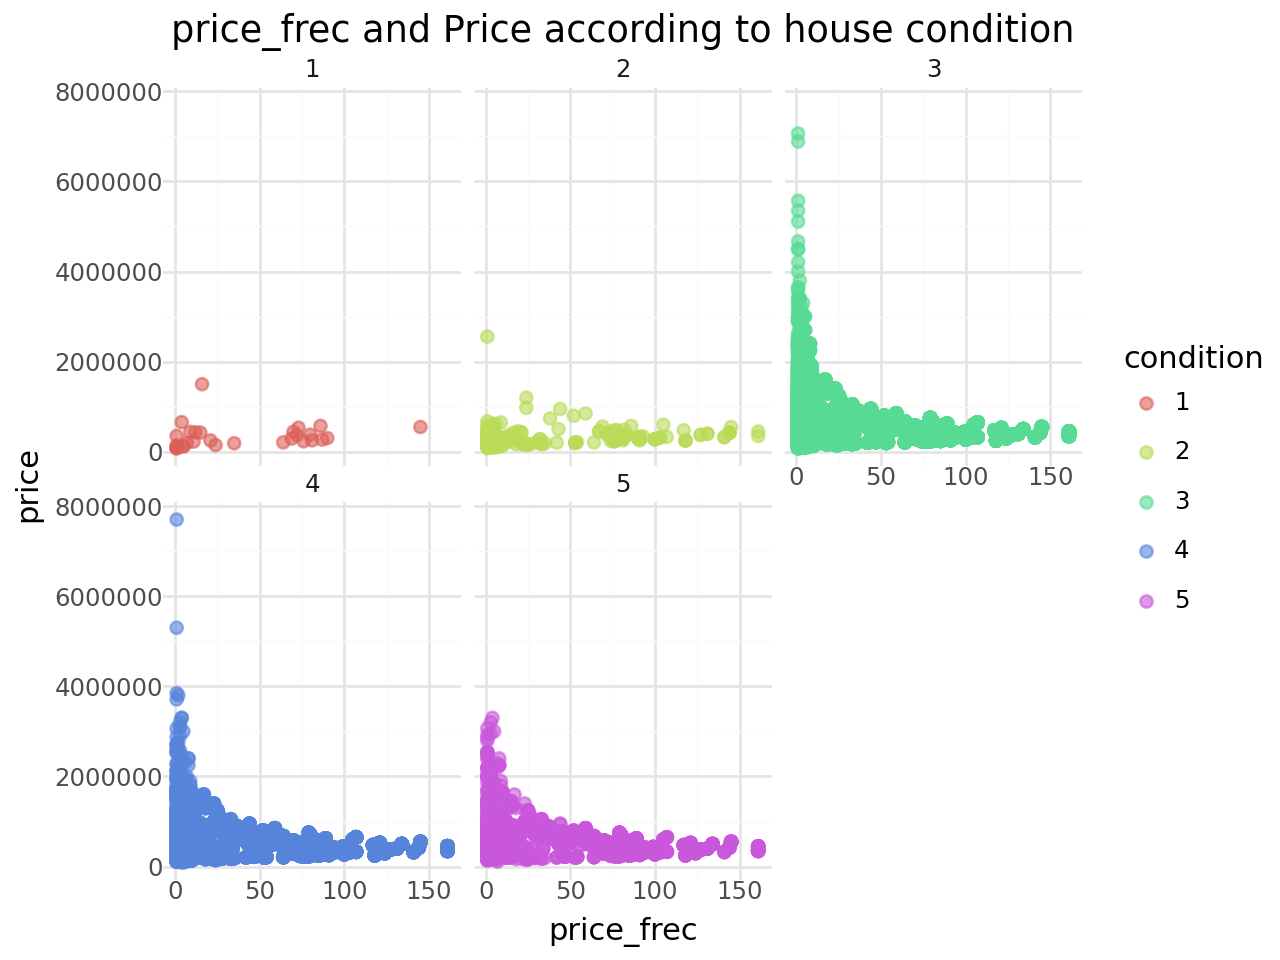

In [ ]:
# PRICE SPREAD BY CONDITION
#condition 3 and 4 have more price variability
from plotnine import ggplot, aes, geom_point, facet_wrap, ggtitle, theme_minimal

# Contar las ocurrencias de cada precio
price_counts = housing['price'].value_counts()

# Asignar la frecuencia de cada precio en la nueva columna 'countp'
housing['price_frec'] = housing['price'].map(price_counts)
housing['condition'] = housing['condition'].astype(str)
# Graficar con ggplot


(ggplot(data=housing, mapping=aes(x='price_frec', y='price', color='condition')) +
    geom_point(alpha=0.6, size=2) +
    facet_wrap(facets='condition') +
    ggtitle("price_frec and Price according to house condition") +
    theme_minimal())



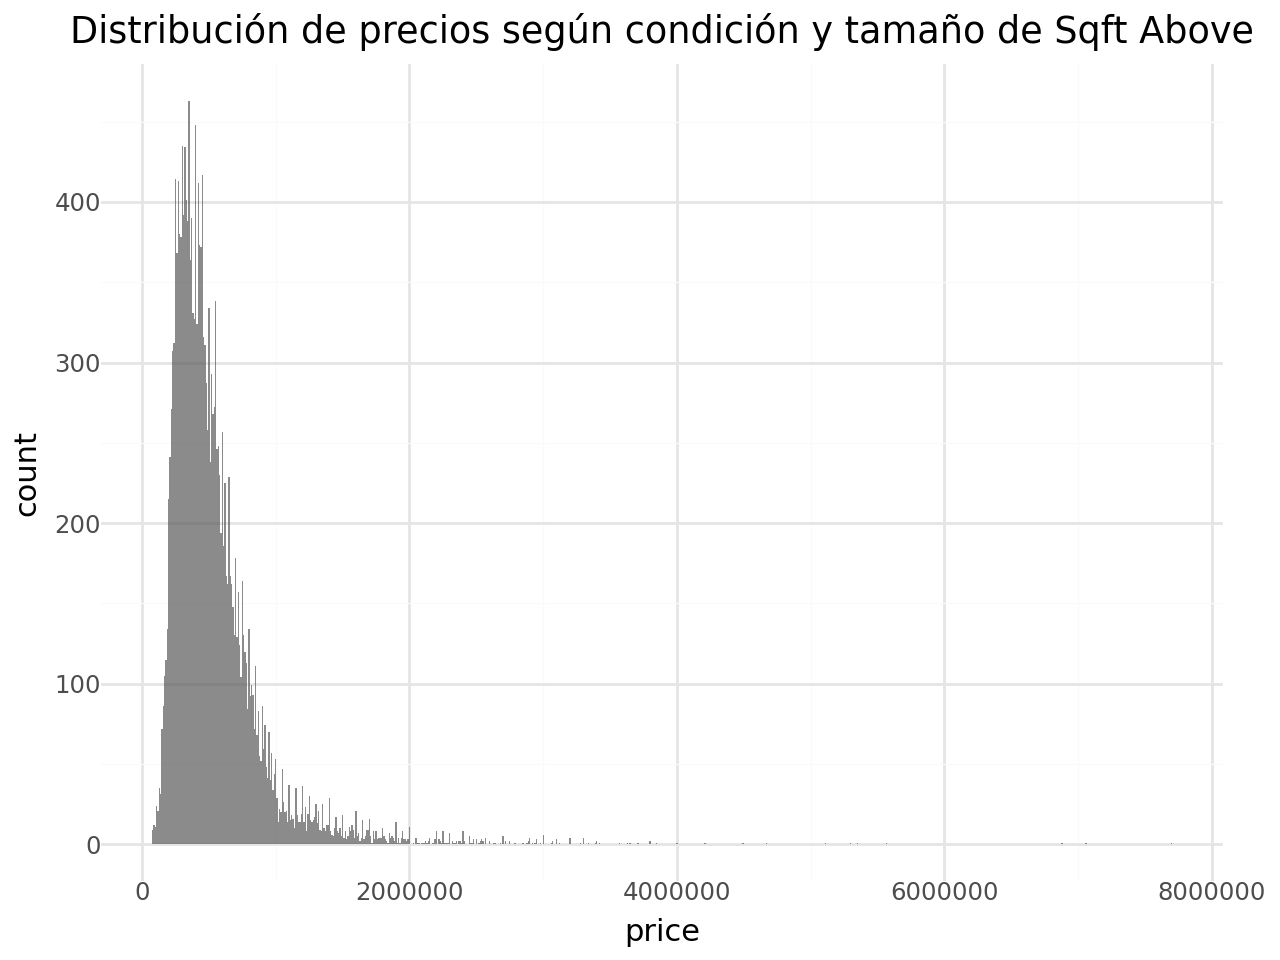

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram, facet_wrap, ggtitle, theme_minimal

(ggplot(data=housing, mapping=aes(x='price')) +
    geom_histogram(binwidth=10000, alpha=0.7) +
    ggtitle("Distribución de precios según condición y tamaño de Sqft Above") +
    theme_minimal())


In [ ]:
# Inspeccionar las primeras filas
print(housing.head())

# Verificar los tipos de datos
print(housing.dtypes)

# Asegurarnos de que 'yr_built' y 'price' sean numéricos, y 'condition' sea string
housing['yr_built'] = pd.to_numeric(housing['yr_built'], errors='coerce')
housing['price'] = pd.to_numeric(housing['price'], errors='coerce')
housing['condition'] = housing['condition'].astype(str)

# Crear columna 'count' para 'yes' y 'no' dependiendo de la renovación
housing['count'] = housing['yr_renovated'].apply(lambda x: 'yes' if x > 0 else 'no')

# Graficar con superposición de puntos
(ggplot(data=housing, mapping=aes(x='yr_built', y='price', color='count')) +
    geom_point() +
    facet_wrap(facets='condition') +
    labs(title="Price based on renovation and year built", x="Year Built", y="Price", color="Condition"))


           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  1565930130         4       3.25         3760      4675     2.0           0   
1  3279000420         3       1.75         1460      7800     1.0           0   
2   194000575         4       1.00         1340      5800     1.5           0   
3  2115510160         3       1.75         1440      8050     1.0           0   
4  7522500005         2       1.50         1780      4750     1.0           0   

   view condition  grade  ...  zipcode      lat     long  sqft_living15  \
0     0         3      8  ...    98038  47.3862 -122.048           3280   
1     0         2      7  ...    98023  47.3035 -122.382           1310   
2     2         3      7  ...    98116  47.5658 -122.389           1900   
3     0         3      8  ...    98023  47.3187 -122.390           1790   
4     0         4      7  ...    98117  47.6859 -122.395           1690   

   sqft_lot15     price  year  month  day  count  
0        40

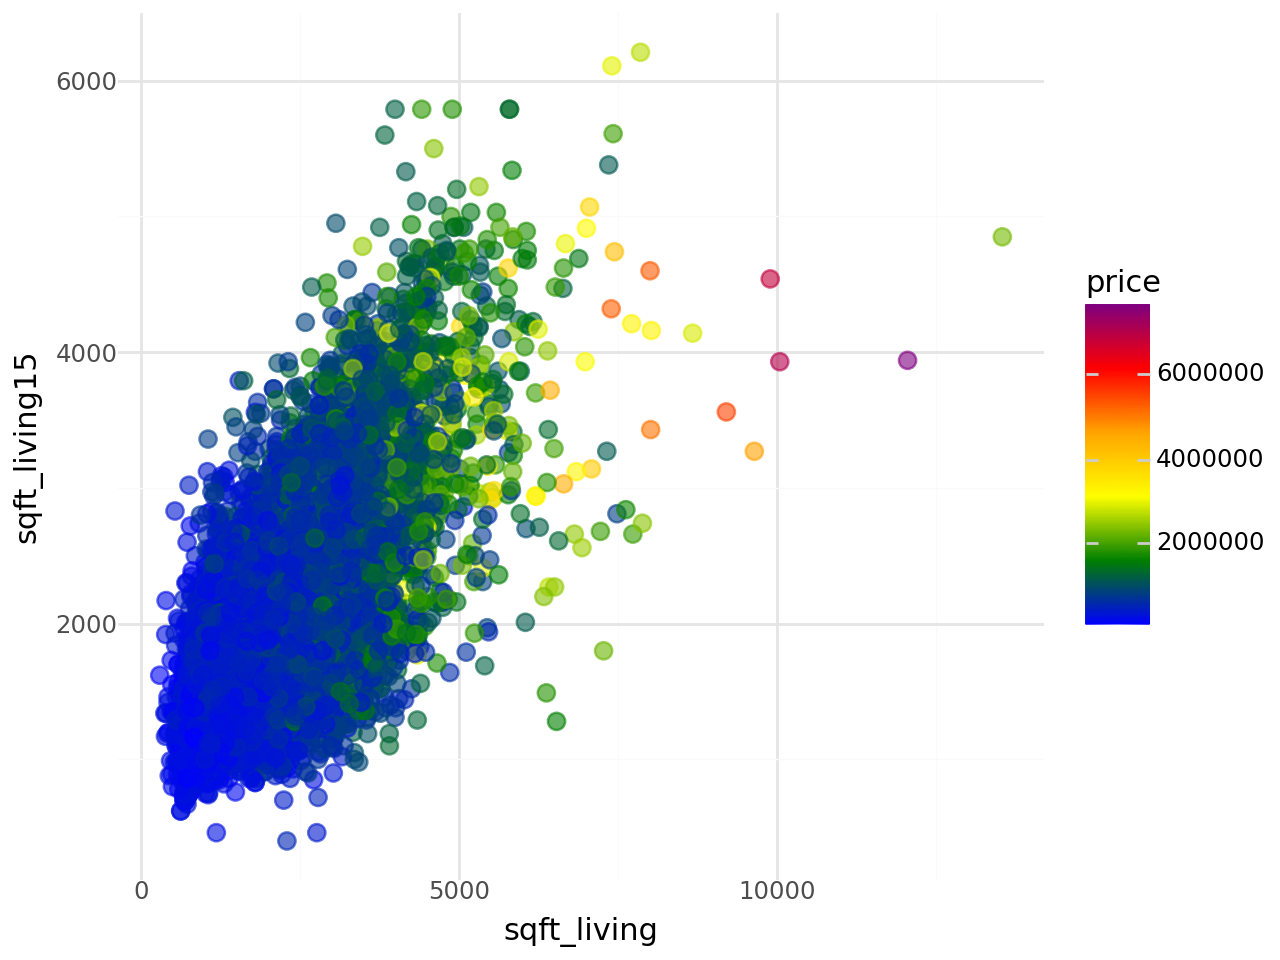

In [ ]:
from plotnine import ggplot, aes, geom_point, geom_smooth, scale_color_gradientn, theme_minimal

ggplot(data=housing, mapping=aes(x='sqft_living', y='sqft_living15', color='price')) + \
    geom_point(size=3, alpha=0.6) + \
    scale_color_gradientn(colors=["blue", "green", "yellow", "orange", "red", "purple"]) + \
    theme_minimal()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium import Popup
from scipy.spatial import KDTree

# Crear una muestra aleatoria de 500 puntos
housing_sample = housing.sample(n=500, random_state=42)

# Crear un KDTree para búsqueda rápida de vecinos
coords = np.column_stack((housing_sample['lat'], housing_sample['long']))
tree = KDTree(coords)

# Definir percentiles
p25, p50, p75, p100 = np.percentile(housing_sample['price'], [25, 50, 75, 100])
s25, s50, s75, s100 = np.percentile(housing_sample['sqft_living'], [25, 50, 75, 100])

def get_color(price):
    if price <= p25:
        return 'green'
    elif price <= p50:
        return 'yellow'
    elif price <= p75:
        return 'orange'
    elif price <= p100:
        return 'red'

def get_size(sqft):
    if sqft <= s25:
        return 6
    elif sqft <= s50:
        return 8
    elif sqft <= s75:
        return 10
    elif sqft <= s100:
        return 12

# Función para encontrar las 15 casas más cercanas
def get_nearest_houses(lat, lon):
    _, indices = tree.query([lat, lon], k=16)  # 16 porque la primera es la misma casa
    return indices[1:]  # Devolver los índices de las casas más cercanas, excluyendo la misma casa

# Inicializar el mapa centrado en Washington State
m = folium.Map(location=[47.5, -120.5], zoom_start=7)

# Agregar marcadores con puntos, tamaño y color basado en precio y tamaño de la casa
for i in range(len(housing_sample)):
    row = housing_sample.iloc[i]

    price = row['price']
    size = get_size(row['sqft_living'])  # Tamaño del círculo basado en percentiles de sqft_living
    condition = row['condition']  # Condición de la casa
    color = get_color(price)  # Color basado en percentiles

    # Buscar las casas más cercanas
    nearest_indices = get_nearest_houses(row['lat'], row['long'])

    # Obtener las 15 casas más cercanas
    nearest_sizes = housing_sample.iloc[nearest_indices]['sqft_living'].values

    # Calcular el porcentaje de cuán más grande es esta casa en relación a las 15 más cercanas
    bigger_than = np.sum(row['sqft_living'] > nearest_sizes)
    percentage_bigger = (bigger_than / len(nearest_sizes)) * 100

    # Crear el contenido del popup
    popup_content = f"""
        <b>Precio:</b> ${price:,.0f}<br>
        <b>Tamaño:</b> {row['sqft_living']} sqft<br>
        <b>Condición:</b> {condition}/5<br>
        <b>Porcentaje más grande que las 15 casas cercanas:</b> {percentage_bigger:.2f}%
    """

    # Crear el marcador con círculo
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=size,  # Tamaño del círculo basado en sqft_living
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=Popup(popup_content, max_width=300)
    ).add_to(m)

# Mostrar el mapa
m


In [ ]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Definir las características (X) y la variable objetivo (y)
X = housing.drop('price', axis=1)
y = housing['price']

# Lista para almacenar los resultados
results = []

# Pruebas con diferentes combinaciones de hiperparámetros
for _ in range(1, 100):
    n_estimators = random.randint(0, 300)  # Número de árboles
    max_depth = random.randint(3, 100)  # Profundidad máxima del árbol
    learning_rate = round(random.uniform(0.01, 0.9), 10)  # Tasa de aprendizaje
    random_state = random.randint(1, 300)

    # División de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Entrenar el modelo XGBoost con los parámetros aleatorios
    model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
                         random_state=random_state)
    model.fit(X_train, y_train)

    # Realizar predicciones
    predictions = model.predict(X_test)

    # Calcular métricas de evaluación
    r2 = r2_score(y_test, predictions)  # R²
    mse = mean_squared_error(y_test, predictions)  # MSE
    rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE (Raíz del MSE)
    mae = mean_absolute_error(y_test, predictions)  # MAE
    log_mse = np.log(mse)  # Log-MSE

    # Guardar resultados
    results.append({
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'random_state': random_state,
        'R²': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'Log-MSE': log_mse
    })

# Convertir resultados a un DataFrame y ordenarlo por R² de mayor a menor
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)

results_df


KeyboardInterrupt: 

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='RMSE', ascending=True)

In [ ]:
results_df

In [ ]:
# Get predictions for our test data
mini_holdout=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')

mini_holdout['year']=(mini_holdout['date'].apply(lambda x:x[0:4])).astype(int)
mini_holdout['month']=(mini_holdout['date'].apply(lambda x:x[4:6])).astype(int)
mini_holdout['day']=(mini_holdout['date'].apply(lambda x:x[6:8])).astype(int)
mini_holdout = mini_holdout.drop(columns=['date'])
#mini_holdout = mini_holdout[['bathrooms', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'view', 'yr_built', 'floors', 'sqft_living', 'lat', 'sqft_above', 'zipcode', 'grade', 'long', 'bedrooms', 'sqft_basement', 'waterfront']]

X = housing.drop('price', axis=1)
y = housing['price']

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Entrenar el modelo XGBoost con los parámetros aleatorios
model = XGBRegressor(n_estimators=195, max_depth=13, learning_rate=0.031,
                      random_state=60)
model.fit(X_train, y_train)

# Realizar predicciones
new_pred = model.predict(mini_holdout)

predictions = pd.DataFrame(new_pred, columns=['price'])


predictions.to_csv("team8-module2-predictions.csv", index=False)
